# Homework Assignment 2 (Question 4) - Ridha's Alkhabaz Solutions

### <u> Case Study</u>: Let's evaluate the clusterability of the Tripadvisor dataset (from lecture 1) and use silhouette plots to evaluate the k-means clusterings found with this dataset.

### Imports

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

#### Make sure you run the following command in your anaconda command prompt before trying to import the package below.

pip install pyclustertend

In [27]:
from pyclustertend import hopkins


/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


### Run this. You will use it later.

In [7]:
def create_silhouette_plot(X, cluster_labels):
    #------------------------------------------------------
    #INPUT:
    #-----------------------------------------------------
    #X=dataframe of objects you clusterted
    #cluster_labels=cluster labels of each of the objects in the dataset X that you just clustered 

    #Gets the unique labels in the cluster_labels
    clabels=np.unique(cluster_labels)
    #Gets the number of unique labels
    k=len(clabels)
    
    #-------------------------------------------------------
    #SETTING UP THE PLOT SPACE
    # Create a subplot with 1 row and 1 columns
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (k+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (k + 1) * 10])

    #FINDS THE SILHOUETTE SCORE FOR EACH OBJECT
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10

    
    for i in clabels:
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    plt.show()

### 4a [1 pts] Read the csv into a dataframe called df and display the first 5 rows of the dataframe.
Read the tripadvisor_review.csv (that's located in this same folder) into a dataframe called df. Then display the first 5 rows df.

In [3]:
df = pd.read_csv("tripadvisor_review.csv")
df.head()

,art_gallery_avg_rating,dance_club_avg_rating,juice_bar_avg_rating,restaurant_avg_rating,museum_avg_rating,resort_avg_rating,park_avg_rating,beach_avg_rating,theatre_avg_rating,religious_institution_avg_rating
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


### Make a copy.
Let's set X to be just the attributes in the dataframe we want to cluster. (ie. just the 10 vacation rating types, not any cluster labels we add on at the end of the notebook).

In [45]:
# Run this
X=df.copy().astype(float)
X.head()

,art_gallery_avg_rating,dance_club_avg_rating,juice_bar_avg_rating,restaurant_avg_rating,museum_avg_rating,resort_avg_rating,park_avg_rating,beach_avg_rating,theatre_avg_rating,religious_institution_avg_rating
0,0.93,1.8,2.29,0.62,0.80,2.42,3.19,2.79,1.82,2.42
1,1.02,2.2,2.66,0.64,1.42,3.18,3.21,2.63,1.86,2.32
2,1.22,0.8,0.54,0.53,0.24,1.54,3.18,2.80,1.31,2.50
3,0.45,1.8,0.29,0.57,0.46,1.52,3.18,2.96,1.57,2.86
4,0.51,1.2,1.18,0.57,1.54,2.02,3.18,2.78,1.18,2.54


### 4b. [2 pts] Calculate five Hopkin's statistics for this dataframe X.

**Reference Lecture 3 notes for code assistance.**

In [25]:
num_trials = 5
hop_stats = []
for i in range(0,5):
    n = len(X)
    p = int(0.1*n)
    hop_stats.append(hopkins(X,p))
print(hop_stats)

[0.17583469964883905, 0.1671436469628863, 0.18323361730183324, 0.17087110943030637, 0.17690633217145696]


### 4c. [2 pts] Do these statistics suggest that the data is clusterable? Explain your answer.

These Hopkin's statistics are much closer to 0 than they are to 0.5. Thus this suggest that the dataset may be clusterable.

### 4d [3pts] Create an average silhouette score plot with the following specifications.
1. Cluster the datafame X using **k-means** nine times.
    * Create the first clustering with k=2 clusters and use a random_state of 100.
    * Create the second clustering with k=3 clusters and use a random_state of 100.
    ...
    * Create the ninth clustering with k=10 clusters and use a random_state of 100.
2. For each of these clusterings, calculate the **average silhouette score of the clustering.**
3. Then create your **silhouette plot** with k=2,...,k=10 on the x-axis and the average silhouette score of each corresponding clustering is on the y-axis.

**Reference the lecture 3 notes for code assistance.**

In [31]:
clustr_num = range(2,11)
Silh_scores = []
for i in clustr_num:
    Kmeans = KMeans(n_clusters = i, random_state=100).fit(X)
    clstr_labels = Kmeans.labels_
    silhoutte_avg = np.float64(silhouette_score(X, clstr_labels))
    Silh_scores.append(silhoutte_avg)

/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/ridhaalkhabaz/opt

/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/cluster/k_means_.py:445: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  max_iter=max_iter, verbose=verbose)
/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; f

/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/ridhaalkhabaz/opt

/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/ridhaalkhabaz/opt

/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/ridhaalkhabaz/opt

/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/ridhaalkhabaz/opt

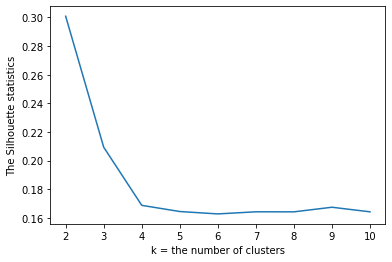

In [21]:
plt.plot(clustr_num, Silh_scores)
plt.xlabel("k = the number of clusters")
plt.ylabel("The average of Silhouette scores for the specified K")
plt.show()

### 4e. [2 pts] How many clusters does the silhouette plot above indicate that we should cluster the dataset with? Explain your answer.

The peak of the average of the Silhouette Score is when k = 2. Thus, this is an indication that the K-means clustering with k = 2 will have have the best cohesion and separation.

### 4f. [2 pts] Cluster the dataset using:
* k-means,
* number of clusters that you selected in 4e, and
* a random_state of 100.

In [46]:
Kmeans = KMeans(n_clusters=2, random_state=100).fit(X)


/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/ridhaalkhabaz/opt

### 4g. [2 pts]
Use the function defined at the beginning of the notebook to create a silhouette plot for this clustering from 6d.

**Reference the Lecture 3 Jupyter notebook for code assistance.**

/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float
/Users/ridhaalkhabaz/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/pairwise.py:56: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype = np.float


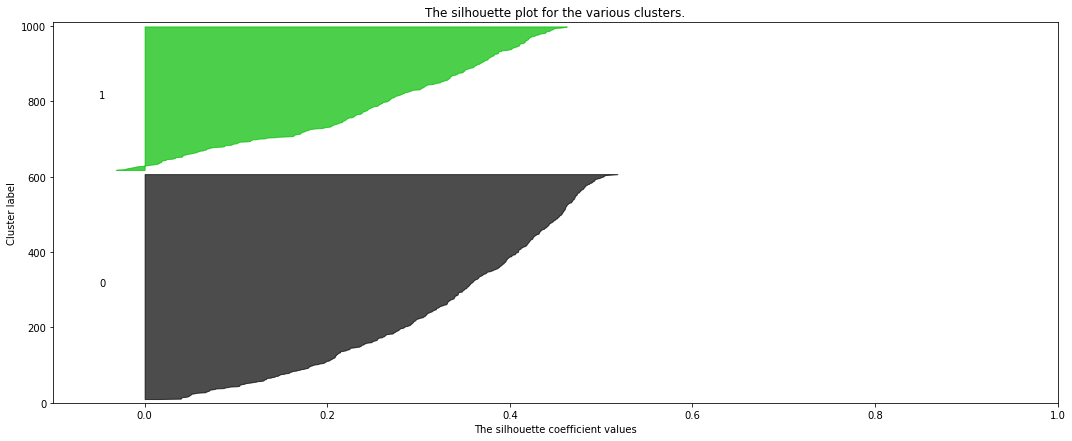

In [23]:
create_silhouette_plot(X, Kmeans.labels_)

### 4h. [2 pts] Does this plot suggest that there are objects that are not cohesive with the cluster they were assigned to and not well separated from other clusters? Explain.

Since there are a fair share of objects with silhouette scores above 0.5, It looks like that the clusters are cohesive and fairly seperated.